# Curreny forecasting

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import datetime

## Import data

In [75]:
df = pd.read_csv (r'Foreign_Exchange_Rates.csv')
df = df.drop('Unnamed: 0',axis=1)
df.columns = ['Time']+[col[:-4] for col in df.columns[1:]]
df['Time'] = pd.to_datetime(df['Time'].astype('str'))

df = df[df['AUSTRALIA - AUSTRALIAN DOLLAR']!='ND']

for col in df.columns[1:]:
    df = df[df[col]!='ND']
    df[col] = df[col].astype(str).astype(float)
    
df

,Time,AUSTRALIA - AUSTRALIAN DOLLAR,EURO AREA - EURO,NEW ZEALAND - NEW ZELAND DOLLAR,UNITED KINGDOM - UNITED KINGDOM POUND,BRAZIL - REAL,CANADA - CANADIAN DOLLAR,CHINA - YUAN,HONG KONG - HONG KONG DOLLAR,INDIA - INDIAN RUPEE,...,SINGAPORE - SINGAPORE DOLLAR,DENMARK - DANISH KRONE,JAPAN - YEN,MALAYSIA - RINGGIT,NORWAY - NORWEGIAN KRONE,SWEDEN - KRONA,SRI LANKA - SRI LANKAN RUPEE,SWITZERLAND - FRANC,TAIWAN - NEW TAIWAN DOLLAR,THAILAND - BAHT
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,1.6563,7.3290,101.70,3.8000,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.2180,103.09,3.8000,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,1.6560,7.2080,103.77,3.8000,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8000,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8000,7.9660,8.4150,73.15,1.5623,30.85,37.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5211,2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,...,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,...,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,...,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94


In [67]:
df.dtypes

Time                                     datetime64[ns]
AUSTRALIA - AUSTRALIAN DOLLAR                   float64
EURO AREA - EURO                                float64
NEW ZEALAND - NEW ZELAND DOLLAR                 float64
UNITED KINGDOM - UNITED KINGDOM POUND           float64
BRAZIL - REAL                                   float64
CANADA - CANADIAN DOLLAR                        float64
CHINA - YUAN                                    float64
HONG KONG - HONG KONG DOLLAR                    float64
INDIA - INDIAN RUPEE                            float64
KOREA - WON                                     float64
MEXICO - MEXICAN PESO                           float64
SOUTH AFRICA - RAND                             float64
SINGAPORE - SINGAPORE DOLLAR                    float64
DENMARK - DANISH KRONE                          float64
JAPAN - YEN                                     float64
MALAYSIA - RINGGIT                              float64
NORWAY - NORWEGIAN KRONE                        

In [68]:
for col in df.columns:
    print("\'%s\',"%col[:])

'Time',
'AUSTRALIA - AUSTRALIAN DOLLAR',
'EURO AREA - EURO',
'NEW ZEALAND - NEW ZELAND DOLLAR',
'UNITED KINGDOM - UNITED KINGDOM POUND',
'BRAZIL - REAL',
'CANADA - CANADIAN DOLLAR',
'CHINA - YUAN',
'HONG KONG - HONG KONG DOLLAR',
'INDIA - INDIAN RUPEE',
'KOREA - WON',
'MEXICO - MEXICAN PESO',
'SOUTH AFRICA - RAND',
'SINGAPORE - SINGAPORE DOLLAR',
'DENMARK - DANISH KRONE',
'JAPAN - YEN',
'MALAYSIA - RINGGIT',
'NORWAY - NORWEGIAN KRONE',
'SWEDEN - KRONA',
'SRI LANKA - SRI LANKAN RUPEE',
'SWITZERLAND - FRANC',
'TAIWAN - NEW TAIWAN DOLLAR',
'THAILAND - BAHT',


## Analysis

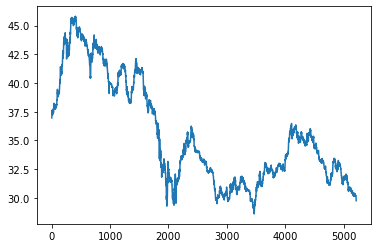

In [10]:
df['THAILAND - BAHT'].plot()

# Feature importance by boosted tree regressor

In [30]:
x_train = df.iloc[:,1:-1]
y_train = df.iloc[:,-1:]
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train,y_train)

C:\Users\PCHANCHA\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(random_state=0)

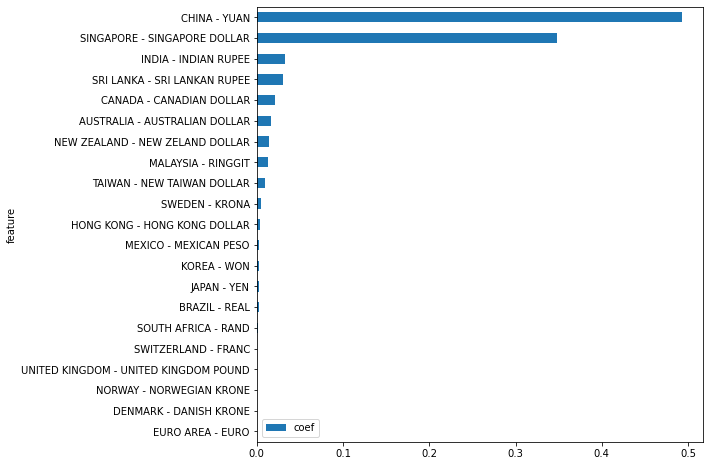

In [57]:
tmp_df = pd.DataFrame({'feature':df.iloc[:,1:-1].columns,'coef':reg.feature_importances_})
tmp_df.sort_values('coef',ascending=True).plot(x='feature',kind='barh',figsize=(8,8))

## Models

In [76]:
date2019 = datetime.date(2019, 1, 1)

In [80]:
train_data = df[df['Time']<pd.Timestamp(date2019)]
test_data = df[df['Time']>=pd.Timestamp(date2019)]